# Problem Statement:

##### Prediction of the prospects of cancellation Random Forest

##### Importing the Datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

## Part - 1 Data Exploration and Pre-Processing

#### 1 - Loading the dataset

In [2]:
df = pd.read_csv(r"C:\Users\Vyas\1_Assignment\ML FT Projects\Random Forest Classification\P9_Hotel_Booking_Cancellation\Python_Project_9_Ran.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03/07/2015


#### 2 - Printing the unique values in all columns

In [3]:
for col in df:
    print(col,df[col].unique())
    print("")

hotel ['Resort Hotel' 'City Hotel']

is_canceled [0 1]

lead_time [342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200 192
 361 207 174 330 134 350 334 283 153 197 133 241 193 235 1

#### 3 - Fill nan value with 'other

In [4]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [5]:
df['country'] = df['country'].replace(np.nan,'other')

#### 4 - Filling nan in agent with mean of agent column

In [6]:
df['agent'] = df['agent'].fillna(df.agent.mean())

In [7]:
df['company'] = df['company'].fillna(df.company.mean())

#### 5 - Droping the nan values from columns

In [8]:
df.dropna(inplace=True)

#### 6 - Plotting the count of adult and children with help of a bar plot

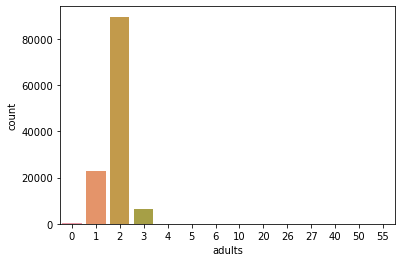

In [9]:
sns.countplot(x='adults', data=df);

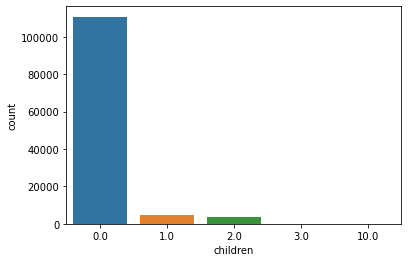

In [10]:
sns.countplot(x='children',data=df);

In [11]:
df = df.drop('reservation_status_date' , axis = 1 )

#### 7 - Performing Label Encoder on Categorial Columns

In [12]:
enco = LabelEncoder()

In [13]:
df['country'] = enco.fit_transform(df['country'])
df['hotel'] = enco.fit_transform(df['hotel'])
df['market_segment'] = enco.fit_transform(df['market_segment'])
df['distribution_channel'] = enco.fit_transform(df['distribution_channel'])
df['meal'] = enco.fit_transform(df['meal'])
df['reserved_room_type'] = enco.fit_transform(df['reserved_room_type'])
df['assigned_room_type'] = enco.fit_transform(df['assigned_room_type'])
df['deposit_type'] = enco.fit_transform(df['deposit_type'])
df['customer_type'] = enco.fit_transform(df['customer_type'])
df['reservation_status'] = enco.fit_transform(df['reservation_status'])
df['arrival_date_month'] = enco.fit_transform(df['arrival_date_month'])

In [14]:
print("No of Rows: ", df.shape[0])
print("No of Columns: ", df.shape[1])

No of Rows:  119386
No of Columns:  31


## Part - 2 Model Building

#### 1 - Creating features and target data

In [15]:
X = df.drop(['is_canceled'],axis=1)
y = df[['is_canceled']]

In [16]:
model = RandomForestClassifier()

In [17]:
import warnings
warnings.filterwarnings('ignore')

#### 2 - Spliting into Training and Testing

#### 3 - Applying Random Forest Classifier on data

In [18]:
tts_tr = []
tts_ts = []
for i in np.arange(0.1,1,0.2):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=i,random_state=6)
    model.fit(X_train,y_train)
    tts_tr.append(model.score(X_train,y_train))
    tts_ts.append(model.score(X_test,y_test))

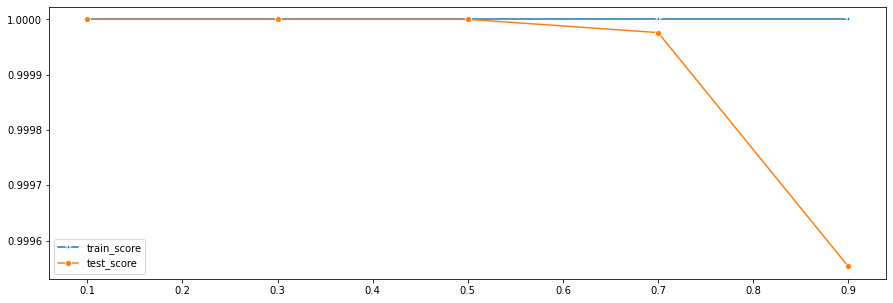

In [19]:
plt.figure(figsize=(15,5))
q = sns.lineplot(np.arange(0.1,1,0.2),tts_tr,marker='*',label='train_score')
q = sns.lineplot(np.arange(0.1,1,0.2),tts_ts,marker='o',label='test_score')

Best score can be obtained when test size is 0.1 to 0.3. We will take test size as 0.2

#### 4 - Creating Function which shows precision score,recall score,accuracy,classification report,and confusion matrix

In [20]:
from sklearn.metrics import precision_score,accuracy_score,recall_score,classification_report,confusion_matrix

In [21]:
def mat_model(model,X_train,X_test,y_train,y_test):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=6)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print("Precision Score: ", precision_score(y_test,y_pred))
    print("")
    print("Accuracy Score: ", accuracy_score(y_test,y_pred))
    print("")
    print("Recall Score: ", recall_score(y_test,y_pred))
    print("")
    print(classification_report(y_test,y_pred,digits=5))
    print("")
    print(confusion_matrix(y_test,y_pred))

In [22]:
mat_model(model,X_train,X_test,y_train,y_test)

Precision Score:  1.0

Accuracy Score:  1.0

Precision Score:  1.0

              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000     15012
           1    1.00000   1.00000   1.00000      8866

    accuracy                        1.00000     23878
   macro avg    1.00000   1.00000   1.00000     23878
weighted avg    1.00000   1.00000   1.00000     23878


[[15012     0]
 [    0  8866]]
